<a href="https://colab.research.google.com/github/DanielRaiicHu/optimizacion_aeroportuaria/blob/main/optimizacion_aeroportuaria.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='#0C4AC6'>**Optimización Aeroportuaria**</h1>

## <font color='#276CF2'>**1. Explorando los datos**</h2>



### <font color='#6595F6'>**Entendiendo el conjunto de datos**</h3>


In [35]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [36]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/optimizacion_aeroportuaria/main/flights.csv'

# Lectura del archivo CSV y almacenamiento en el DataFrame 'datos'
datos = pd.read_csv(url)

# Verificación del tamaño del DataFrame
datos.shape # filas: 71175, columnas: 11

(71175, 11)

In [37]:
datos.head()
# flight_id: id del vuelo
# airline: aerolínea
# aircraft_type: tipo de aeronave
# schengen: indica si el origen pertenece al espacio Schengen
# origin: aeropuerto de origen
# arrival_time: hora de llegada (en formato decimal)
# departure_time: hora de salida (en formato decimal)
# day: día del año (1 a 365)
# year: año del vuelo
# is_holiday: indica si el día es festivo
# delay: retraso del vuelo en minutos.segundos

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [38]:
# Ejemplo para convertir parte decimal de minutos a segundos
# Los segundos se calculan multiplicando la parte decimal por 60
round(.205981 * 60)  # Ejemplo: 70.205981 → 70 minutos y 12 segundos

12

In [39]:
minutos_decimales = 70.205981
# Obtener los minutos
minutos = int(minutos_decimales)
# Obtener la parte decimal
decimal = minutos_decimales - minutos
# Convertir la parte decimal a segundos
segundos = round(decimal * 60)
print(f"{minutos} minutos y {segundos} segundos")

70 minutos y 12 segundos


In [40]:
# Información general del DataFrame (nombres de columnas, cantidad de valores no nulos, tipo de datos)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [41]:
# Estadísticas descriptivas de variables numéricas
datos.describe()

# Muestra métricas como:
# count: número de registros
# mean: promedio
# std: desviación estándar
# min, max: valores mínimo y máximo
# 25%, 50%, 75%: percentiles

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [42]:
# Estadísticas descriptivas de variables categóricas
datos.describe(include = 'O')

# 'count': cantidad de registros no nulos
# 'unique': cantidad de valores únicos
# 'top': valor más frecuente
# 'freq': frecuencia del valor más frecuente

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


**Análisis y descripción**

**¿Qué hace?**

* Carga un dataset de retrasos de vuelos desde GitHub.

* Muestra una vista inicial (head) para entender la estructura.

* Explica el significado de cada columna.

* Realiza una conversión de parte decimal de minutos a segundos para interpretar mejor la variable delay.

* Consulta metadatos (info) para identificar tipos de datos y valores nulos.

* Genera estadísticas descriptivas para variables numéricas y categóricas.

**¿Qué se identificó?**

* Tamaño: 71.175 registros y 11 columnas.

* Tipos de datos: combinación de enteros, flotantes, objetos y booleanos.

* **delay:** puede tener valores negativos (indica vuelos adelantados) y muy altos (hasta 125 minutos).

* Categorías:

>* airline: 3 aerolíneas, la más frecuente es BZ.
>
>* aircraft_type: 6 tipos de aeronaves, predominando Airbus A320.
>
>* schengen: 2 categorías (schengen / non-schengen).
>
>* origin: 10 aeropuertos de origen, más frecuente TZF.

**¿Qué se puede hacer?**

* Convertir arrival_time y departure_time de formato decimal a horas/minutos legibles.

* Transformar delay a formato minutos y segundos para mayor claridad.

* Analizar la distribución de retrasos y valores negativos.

* Explorar si los días festivos (is_holiday) influyen en los retrasos.

**Conclusión breve:**

* El dataset está completo (sin nulos), variado en tipos de datos y listo para iniciar exploración gráfica y preprocesamiento.

* Se observa que la variable delay puede representar tanto retrasos como adelantos, lo que influirá en cómo se clasifique el problema de predicción.

### <font color='#6595F6'>**Análisis gráfico del conjunto de datos**</h3>

In [43]:
# Importamos librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Agrupamos por aérolineas y nuestra variable respuesta es delay (retraso)
datos.groupby('airline')['delay'].mean()

# Lo anterior devuelve una Serie con aerolínea como índice y el promedio de delay como valor.

,delay
airline,
BZ,3.077595
MM,40.498007
YE,25.772248


In [45]:
# .reset_index() convierte el índice (airline) en columna normal.

# Si queremos el resultado como DataFrame y no como índice:
datos.groupby('airline')['delay'].mean().reset_index()


,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


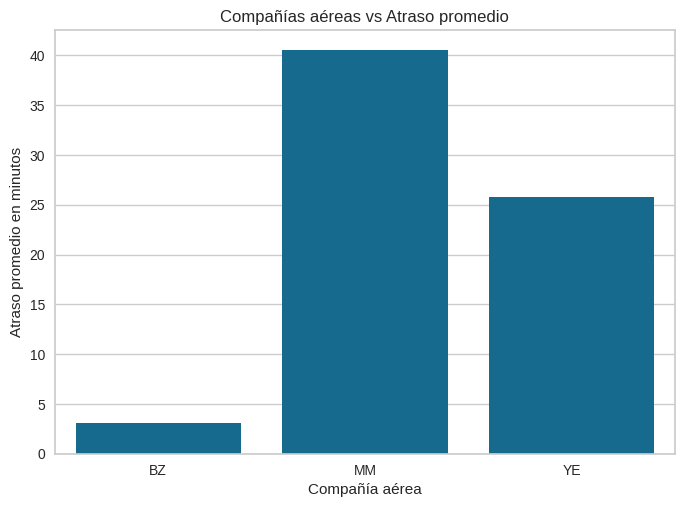

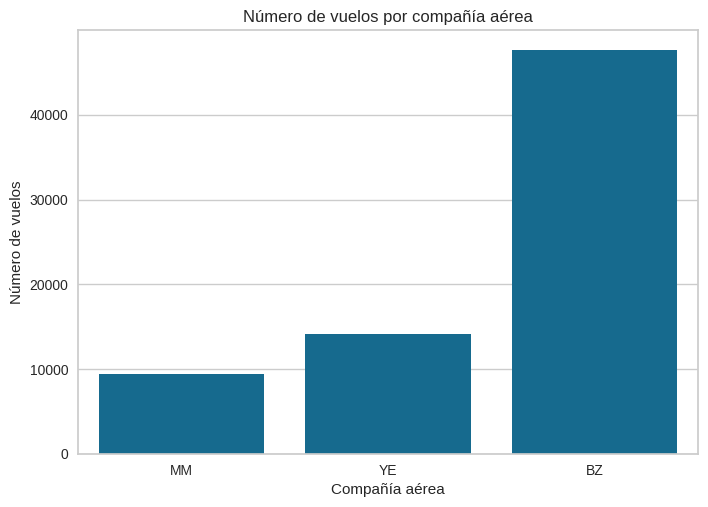

In [59]:
# Creamos un DataFrame con el retraso promedio por aerolínea
avg_delay = datos.groupby('airline')['delay'].mean().reset_index() # average delay o  promedio de retraso

# Gráfico de barras: aerolínea vs retraso promedio
sns.barplot(x='airline', y='delay', data= avg_delay)
plt.title('Compañías aéreas vs Atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

print('\n')

# Gráfico de barras de cantidad de vuelos por aerolínea
sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

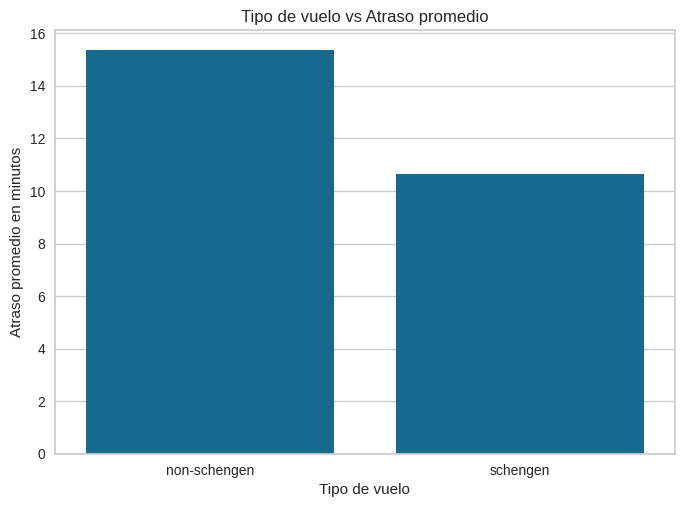

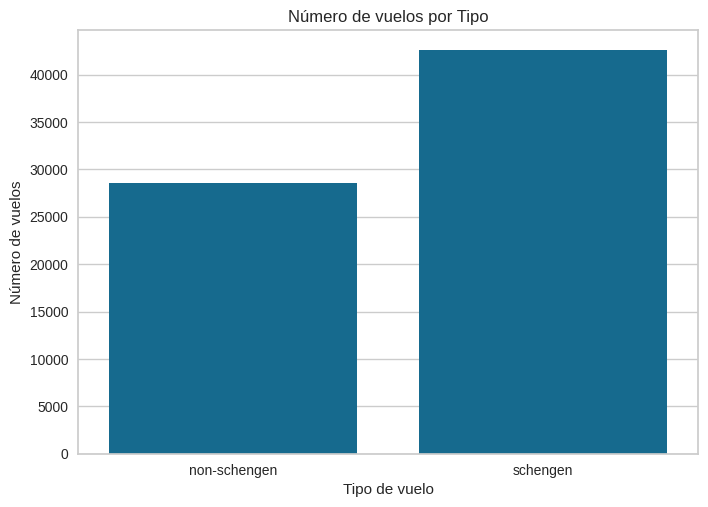

In [48]:
# Retraso promedio por tipo de vuelo (schengen / non-schengen)

avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data= avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

print('\n')

# Número de vuelos por tipo de vuelo
sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

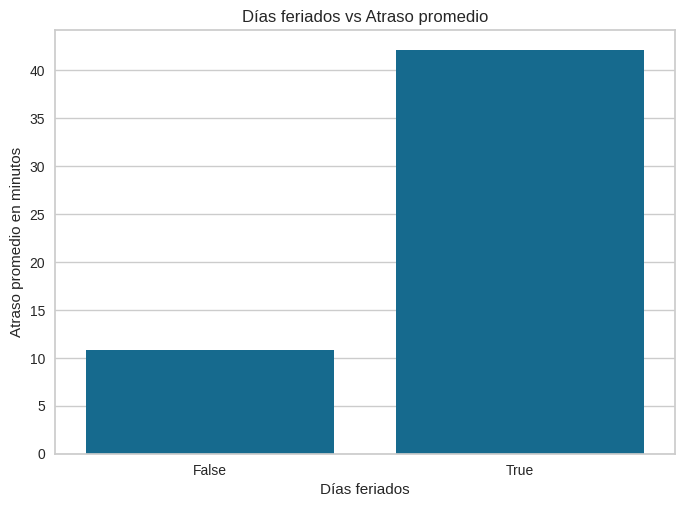

In [51]:
# Retraso promedio en días festivos vs no festivos
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index() # average delay o  promedio de retraso

sns.barplot(x='is_holiday', y='delay', data= avg_delay)
plt.title('Días feriados vs Atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [54]:
# .value_counts: Devuelve una Serie que contiene los conteos de valores únicos en la columna 'aircraft_type'.
# .index: Obtienes un objeto Index que contiene los valores únicos de 'aircraft_type' ordenados según sus conteos.
datos['aircraft_type'].value_counts().index
# 'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175', 'Boeing 737', 'Boeing 777'

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [55]:
# Conteo de vuelos por tipo de aeronave
# value_counts() devuelve el conteo de cada categoría
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


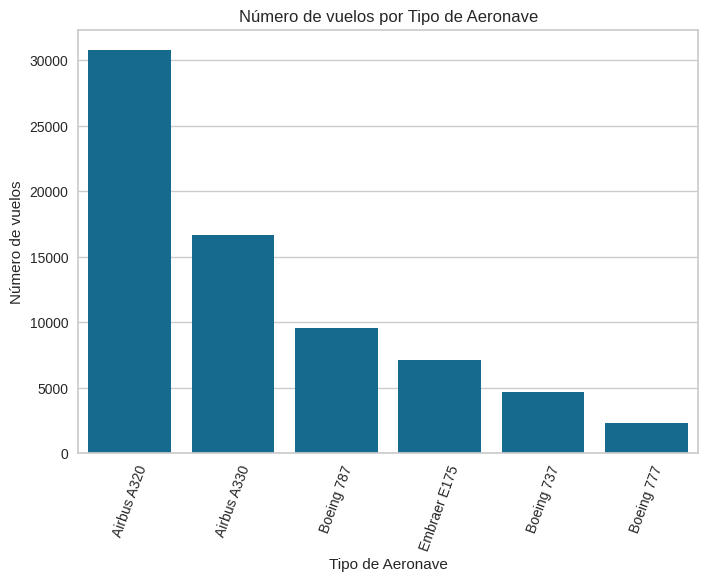

In [57]:
# value_counts().index devuelve solo el orden de las categorías por frecuencia
order = datos['aircraft_type'].value_counts().index

# Gráfico de número de vuelos por tipo de aeronave (ordenado por frecuencia)
sns.countplot(data=datos, x='aircraft_type', order = order)
plt.title('Número de vuelos por Tipo de Aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

**Análisis y descripción**

**¿Qué hace?**

* Agrupa los datos por variables categóricas (airline, schengen, is_holiday, aircraft_type) para calcular el retraso promedio.

* Genera gráficos comparativos para:

>* Retraso promedio por aerolínea, tipo de vuelo y días festivos.
>
>* Número de vuelos por aerolínea, tipo de vuelo y tipo de aeronave.

**¿Qué se identificó?**

**Aerolíneas:**

* **MM:** mayor retraso promedio (~40 min).

* **YE:** retraso intermedio (~25 min).

* **BZ:** menor retraso promedio (~3 min), pero con más vuelos que las demás.

**Tipo de vuelo:**

* **non-schengen:** retraso promedio mayor (~15 min).

* **schengen:** menor retraso (~11 min) pero más vuelos.

**Días festivos:**

* Retrasos mucho mayores (~41 min) comparado con días normales (~11 min).

**Tipo de aeronave:**

* **Más frecuente:** Airbus A320 (30.778 vuelos).

* **Menos frecuente:** Boeing 777 (2.317 vuelos).

**¿Qué se puede hacer?**

* **Aerolíneas:** investigar causas operativas por las que MM y YE tienen más retrasos.

* **Tipo de vuelo:** evaluar si la complejidad operativa de vuelos internacionales (non-schengen) influye en los retrasos.

* **Festivos:** planificar recursos extra en días festivos para reducir retrasos.

* **Aeronaves:** analizar si ciertos modelos (p. ej. Airbus A320) tienen mejor puntualidad debido a su alta frecuencia.

**Conclusión breve**

* La aerolínea BZ es la más puntual y con más vuelos.

* Los vuelos non-schengen y en días festivos presentan mayores retrasos, lo que puede servir como variable predictora clave en el modelo de Machine Learning.

* Se confirma que el tipo de aeronave y la aerolínea podrían ser factores importantes para predecir retrasos.

### <font color='#6595F6'>**Analizando la distribución de los datos**</h3>

Para determinar el ancho de los bins en un histograma:
https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

**Descripción de métodos nuevos antes de los código**

* **`np.percentile():`** Calcula el percentil especificado de un array.
Ejemplo: np.percentile(columna, 75) devuelve el valor del percentil 75.

* **`IQR (Interquartile Range):`** Diferencia entre percentil 75 (Q3) y percentil 25 (Q1). Mide la dispersión central de los datos.

* **`np.power(a, b):`** Eleva a a la potencia b.

* **`Regla de Freedman-Diaconis:`** Fórmula estadística para calcular el ancho óptimo de los bins en un histograma:
ancho = 2 * IQR * n^(-1/3), donde n es el número de observaciones.

* **`plt.axhline():`** Dibuja una línea horizontal en el gráfico.

* **`plt.axvline():`** Dibuja una línea vertical en el gráfico.

* **`plt.tight_layout():`** Ajusta automáticamente el espaciado de los elementos de la figura para evitar solapamientos.

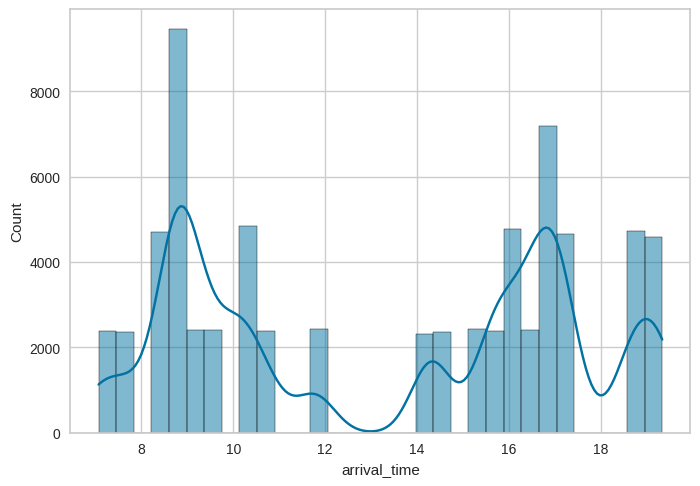

In [61]:
# El ancho de este gráfico no es el más correcto
# Para ello utilizaremos la regla de Freedman Diaconis, para determinar el ancho de los bins

# Histograma inicial del horario de llegada (arrival_time) con curva KDE (densidad)
sns.histplot(data=datos, x='arrival_time',kde=True);

In [62]:
import numpy as np

In [67]:
# Función para determinar el ancho óptimo de los bins usando la regla de Freedman-Diaconis
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

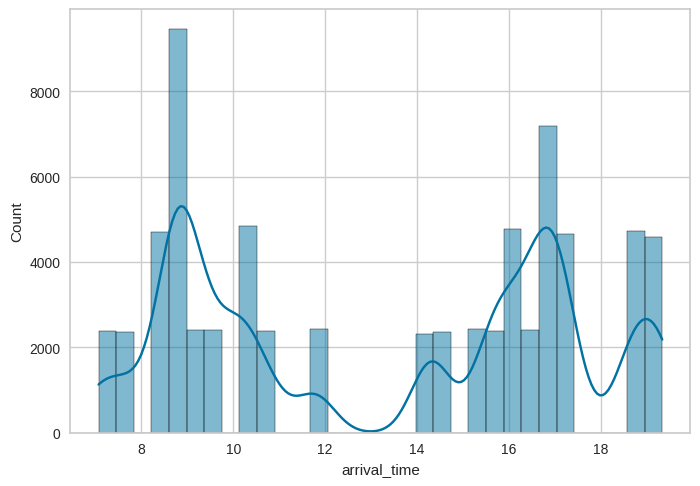

In [69]:
# Histograma del horario de llegada con binwidth optimizado
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True, binwidth=binwidth);

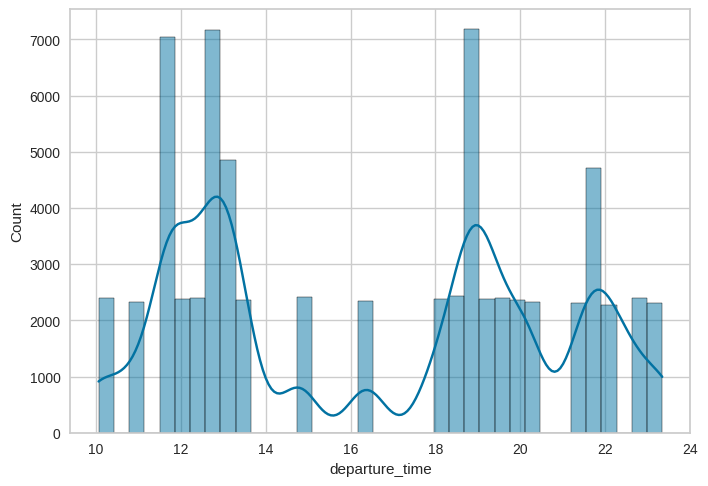

In [71]:
# Histograma del horario de salida con binwidth optimizado
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True, binwidth=binwidth);

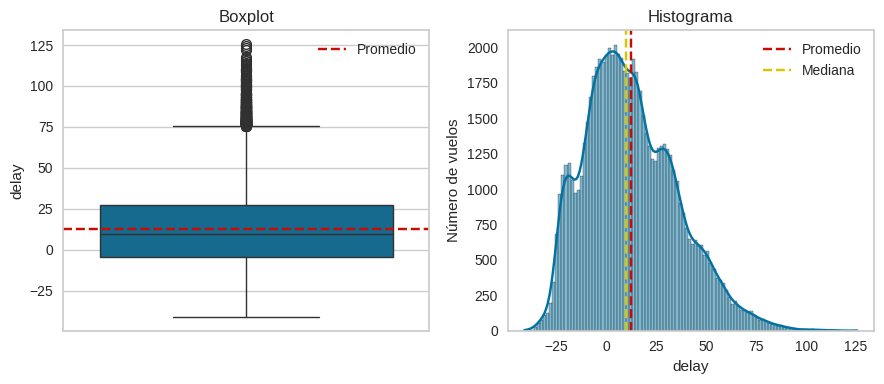

In [74]:
# Gráfico de distribución de la variable respuesta (retrasos en los vuelos)

# Calculamos estadísticas de la variable delay
atraso_promedio = datos['delay'].mean() # Almacenamos el atraso promedio
atraso_mediana = datos['delay'].median() # Almacenamos la mediana de los atrasos

# Boxplot de 'delay'
fix, ax = plt.subplots(1,2, figsize=(9,4)) # 2 gráficos lado a lado
sns.boxplot(data=datos, y='delay', ax=ax[0]) # este será el primer gráfico (izquierda)
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color = 'r', linestyle='--', label='Promedio')
ax[0].legend()


# Histograma de 'delay'
binwidth = ancho_bin (datos, 'delay')

sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth) # ese será el segundo gráfico (derecha)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color = 'r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color = 'y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

**Análisis y descripción**

**¿Qué hace?**

* Crea histogramas de arrival_time, departure_time y delay usando un ancho de bin calculado con la regla de Freedman-Diaconis para mejorar la representación de la distribución.

* Compara la distribución de delay en dos formas:

>* Boxplot: para visualizar mediana, dispersión y outliers.
>
>* Histograma: para ver la forma de la distribución y compararla con promedio y mediana.

**¿Qué se identificó?**

* **Horarios de llegada y salida:**

>* Picos marcados alrededor de ciertas horas específicas (posibles horarios punta).
>
>* Distribución bimodal, lo que indica más de un bloque horario de alta actividad.

* **Retrasos (delay):**

>* Promedio ≈ 12 min, mediana ≈ ligeramente menor.
>
>* Muchos valores cercanos a cero, pero con presencia de retrasos altos (outliers).
>
>* Valores negativos (adelantos) también presentes.

* **Dispersión y outliers:**

>* El boxplot muestra una gran cantidad de outliers por encima de 75 minutos.
>
>* Distribución asimétrica hacia la derecha (cola larga positiva).

**¿Qué se puede hacer?**

* Analizar la causa de los picos en horas específicas para llegada y salida.

* Investigar los vuelos con retrasos extremos para identificar patrones.

* Decidir si se transformará delay en variable binaria (retrasado/no retrasado) para clasificación.

* Considerar si se deben recortar outliers o aplicar transformaciones para el modelo.

**Conclusión breve**

* Hay horarios de mayor actividad que podrían asociarse a más retrasos.

* Los retrasos no siguen una distribución normal, tienen asimetría y outliers, lo que influirá en cómo se entrene el modelo de predicción.

---
**En esta clase, aprendiste a:**
* Analizar las estadísticas descriptivas de los datos;
* Obtener información relevante de los datos, como la cantidad de datos nulos y el tipo de las columnas;
* Construir el análisis gráfico de los datos;
* Construir la visualización gráfica de la distribución de los datos.
---

## <font color='#276CF2'>**2. Feature Engineering**</h2>

### <font color='#6595F6'>**Creando nuevas columnas**</h3>

### <font color='#6595F6'>**Feature encoding**</h3>

### <font color='#6595F6'>**Limpiando los datos**</h3>